In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim

from tqdm.notebook import tqdm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

from sklearn.preprocessing import OrdinalEncoder
from dateutil import parser

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/My Drive/KaggleV2-May-2016.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df = df.drop_duplicates()
df.shape

In [ ]:
print('number of unique values in col :')
for c in df.columns:
    unique = df[c].nunique()
    if (unique <= 20):
        print('values: ',df[c].unique(),'-->   CATEGORICAL   -->     ', end='')
    print('"',c,'"','= ', unique)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df['No-show'] = train_df['No-show'].map({'No': 0, 'Yes': 1})
train_df['Gender'] = train_df['Gender'].map({'M': 0, 'F': 1})

test_df['Gender'] = test_df['Gender'].map({'M': 0, 'F': 1})
test_df['No-show'] = test_df['No-show'].map({'No': 0, 'Yes': 1})

In [ ]:
train_df = train_df.drop('AppointmentID', axis=1)
test_df = test_df.drop('AppointmentID', axis=1)

In [ ]:
train_df.head()

In [ ]:
train_df['scheduled_hour']=[parser.isoparse(date).hour for date in train_df['ScheduledDay']]
test_df['scheduled_hour']=[parser.isoparse(date).hour for date in test_df['ScheduledDay']]

In [ ]:
train_df['ScheduledDay']=[parser.isoparse(date).date() for date in train_df['ScheduledDay']]
test_df['ScheduledDay']=[parser.isoparse(date).date() for date in test_df['ScheduledDay']]

In [ ]:
train_df['AppointmentDay']=[parser.isoparse(date).date() for date in train_df['AppointmentDay']]
test_df['AppointmentDay']=[parser.isoparse(date).date() for date in test_df['AppointmentDay']]

In [ ]:
train_df['sched_app_diff']=(pd.to_datetime(train_df['AppointmentDay'])-pd.to_datetime(train_df['ScheduledDay'])).dt.days
test_df['sched_app_diff']=(pd.to_datetime(test_df['AppointmentDay'])-pd.to_datetime(test_df['ScheduledDay'])).dt.days

In [ ]:
plt.hist(train_df['No-show'])

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(data=train_df, x='Age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
variables = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for var in variables:
    plt.figure(figsize=(3, 2))
    sns.countplot(data=train_df, x=var)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='Age', y='sched_app_diff')
plt.title('Age vs. how many days before the appointment they scheduled it')
plt.xlabel('Age')
plt.ylabel('Time Difference (Days)')

Text(0, 0.5, 'No-show')

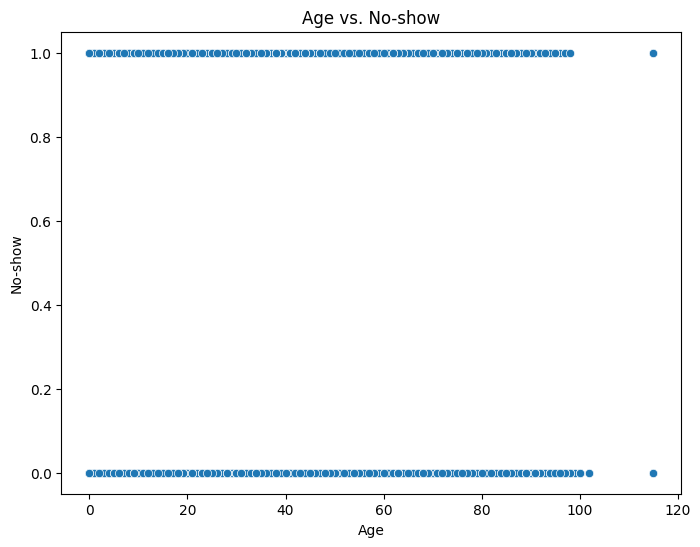

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='Age', y='No-show')
plt.title('Age vs. No-show')
plt.xlabel('Age')
plt.ylabel('No-show')

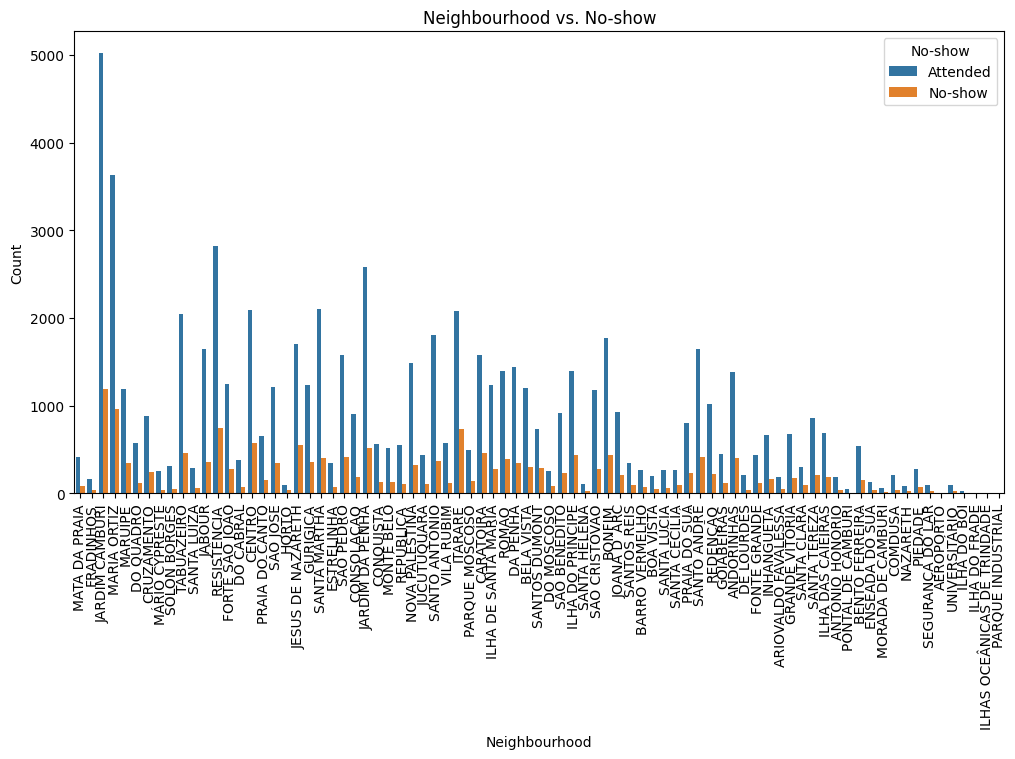

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Neighbourhood', hue='No-show')
plt.title('Neighbourhood vs. No-show')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='No-show', labels=['Attended', 'No-show'])
plt.show()

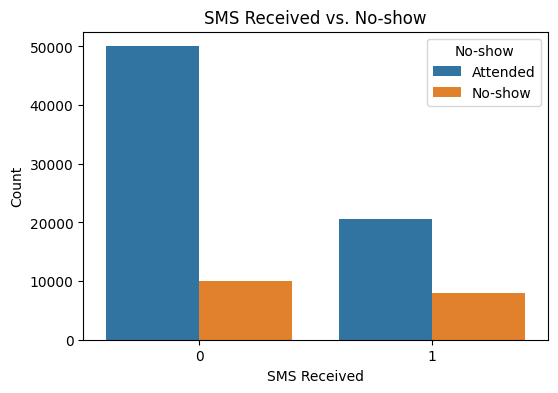

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='SMS_received', hue='No-show')
plt.title('SMS Received vs. No-show')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Attended', 'No-show'])
plt.show()

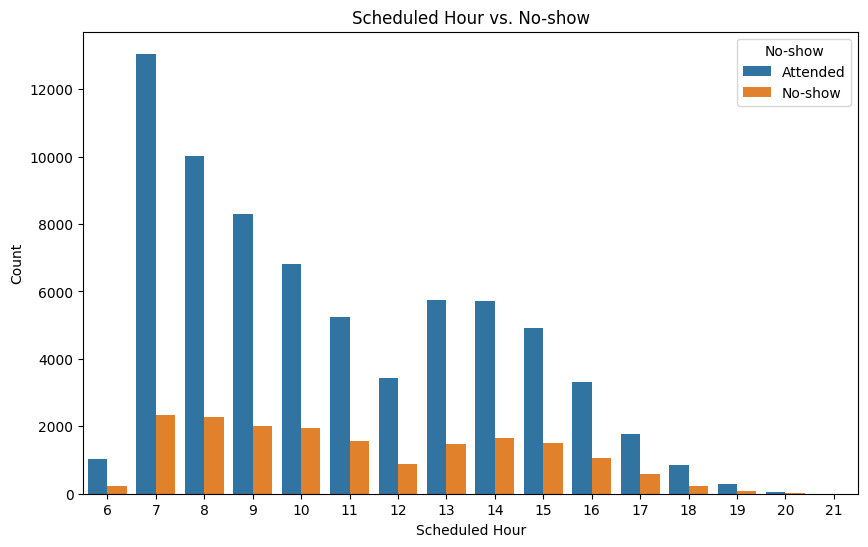

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='scheduled_hour', hue='No-show')
plt.title('Scheduled Hour vs. No-show')
plt.xlabel('Scheduled Hour')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Attended', 'No-show'])
plt.show()

In [ ]:
columns_to_onehot_encode = ['Handcap', 'Neighbourhood']
columns_to_ordinal_encode = ['AppointmentDay', 'ScheduledDay']
columns_to_scale = ['sched_app_diff', 'scheduled_hour', 'Age', 'PatientId', 'sched_app_diff']

In [ ]:
encoder = OrdinalEncoder()

encoder.fit(df[columns_to_ordinal_encode])


encoded_train = encoder.transform(train_df[columns_to_encode])

encoded_test = encoder.transform(test_df[columns_to_encode])



array([[15.],
       [13.],
       [ 6.],
       ...,
       [26.],
       [ 0.],
       [ 8.]])

In [ ]:
train_df_encoded['AppointmentDay'] = encoded_dates